### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<Axes: >

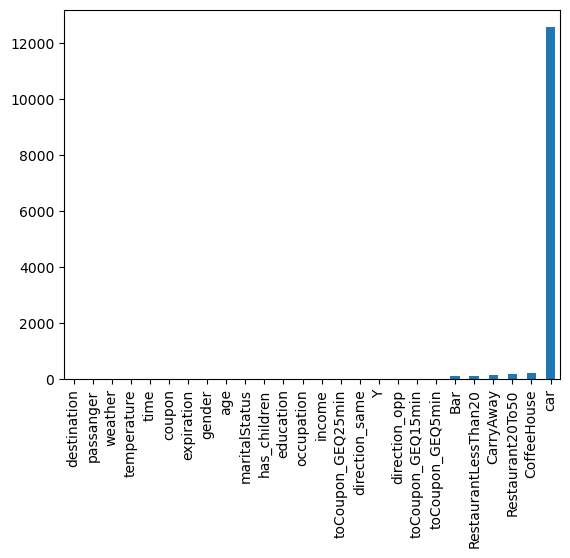

In [4]:
#Analyzing data types to ensure proper analysis, plotting, etc.
data.info()
#initial findings: "age" object but no need to convert to int64 because two values "50plus" and "21below" are necessary
#"car" is lots of nulls, and columns 15-19 have few nulls

data.isnull().sum().sort_values().plot(kind = 'bar')

3. Decide what to do about your missing data -- drop, replace, other...

In [58]:
#adding "ID" title index for later use 
data.index.name = "ID"

#replace nulls with "never"
data = data.fillna({
    'Bar': 'never',
    'CoffeeHouse': 'never',
    'CarryAway': 'never', 
    'RestuarantLessThan20': 'never',
    'Restaurant20To50': 'never'})

data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
ID,,,,,,,,,,,,,,,,,,,,,
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [26]:
#Gives total rows 
total_count = data['Y'].value_counts().sum()

#Gives total accepted  
total_yes = data['Y'].sum()

#Proportion accepted = accepted / total
total_percent_yes = (total_yes/total_count)

print(f"{total_percent_yes:.0%}")



57%


5. Use a bar plot to visualize the `coupon` column.

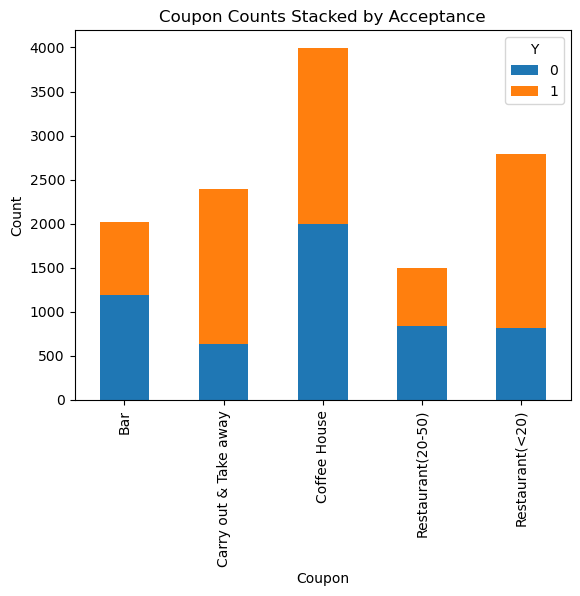

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#bar plot stacking accepted and non-accepted separated by coupon type
pd.crosstab(data["coupon"], data["Y"]).plot(kind="bar", stacked=True)

#plot labels
plt.xlabel("Coupon")
plt.ylabel("Count")
plt.title("Coupon Counts Stacked by Acceptance")
plt.savefig("images/coupon_acceptance_subplots.png", dpi=300, bbox_inches="tight")
plt.show()



6. Use a histogram to visualize the temperature column.

In [29]:
#import libraries
import matplotlib.pyplot as plt

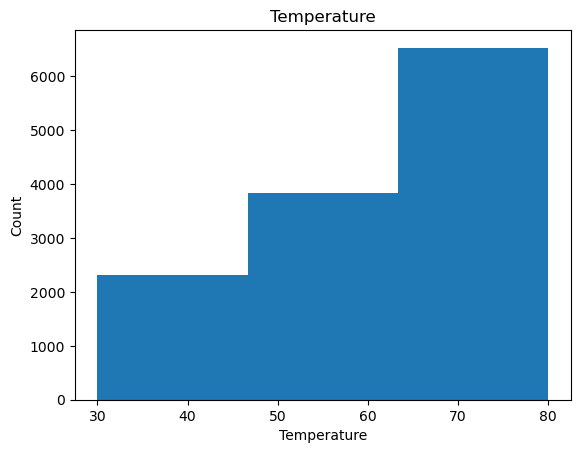

In [135]:
#plot temperature data
plt.hist(data["temperature"], bins=3)

#add plot labels
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Temperature")
plt.savefig("images/temperature_hist.png", dpi=300, bbox_inches="tight")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [41]:
#new DataFrame using coupon column and filtered by Bar
bar_data = data[data['coupon'].str.contains('Bar')]
bar_data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. What proportion of bar coupons were accepted?


In [45]:
#Gives total rows with “Bar”
bar_count = bar_data['Y'].value_counts().sum()

#Gives total accepted by “Bar”
bar_yes = bar_data['Y'].sum()

#Proportion accepted by “Bar”
bar_percent_yes = (bar_yes/bar_count)
print(f"{bar_percent_yes:.0%}")


41%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [49]:
#Gives total count for bar coupons of 3less and 4more
criteria_3less = ['never', 'less1', '1~3']
criteria_4more = ['4~8', 'gt8']
bar_3less = bar_data['Bar'].isin(criteria_3less).sum()
bar_4more= bar_data['Bar'].isin(criteria_4more).sum()

#Gives total count for accepted bar coupons of 3less and 4more 
bar_3l_Y = bar_data.loc[bar_data['Bar'].isin(criteria_3less), 'Y'].sum()
bar_4m_Y = bar_data.loc[bar_data['Bar'].isin(criteria_4more), 'Y'].sum()

#Gives accepted % bar coupons of 3less 
bar_per_3l_Y = (bar_3l_Y/bar_3less) * 100
bar_per_4m_Y = (bar_4m_Y/bar_4more) * 100


#print("3 or fewer: {},4 or more: {}".format(bar_per_3l_Y, bar_per_4m_Y))
print(f"3 or fewer: {bar_per_3l_Y:.0f}%\n4 or more: {bar_per_4m_Y:.0f}%")


3 or fewer: 37%
4 or more: 77%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [71]:
#Criteria for attending bars more than once and drivers > 25
criteria_bar_1more = ['1~3', '4~8', 'gt8']
criteria_age_25more = ['26', '31', '36', '41', '46', '50plus']
#Subsets Bar Data for Bar once or more and Age 25+
bar_bar1m_age25m = bar_data.loc[bar_data['Bar'].isin(criteria_bar_1more) & bar_data['age'].isin(criteria_age_25more),'Y']

#Acceptance Proportion for Bar once or more and Age 25+
bar_bar1m_age25m_Y = (bar_bar1m_age25m.sum() / bar_bar1m_age25m.value_counts().sum())*100

#Subsets Data for everyone OTHER than (Bar once or more & Age 25+)
data_other = data[~data.index.isin(bar_bar1m_age25m.index)]
data_other_Y=(data_other['Y'].sum()/data_other['Y'].value_counts().sum())*100

#Display answers
print("Accetped by Bar once or more & Age > 25: {:.0f}%,Accepted by All other drivers: {:.0f}%".format(bar_bar1m_age25m_Y, data_other_Y))


Accetped by Bar once or more & Age > 25: 70%,Accepted by All other drivers: 56%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [84]:
#Criteria for attending bars more than once and passengers NOT kids
#include
criteria_bar_1more = ['1~3', '4~8', 'gt8']
criteria_pass_nokids = ['Alone', 'Friend(s)', 'Partner']
#exclude occupations 
criteria_occupation = ['Farming Fishing & Forestry']

#Subset the data for listed criteria 
bar1m_nokids_occ = data[(~data['occupation'].isin(criteria_occupation)) &   # NOT in exclude_values
(data['passanger'].isin(criteria_pass_nokids)) &  # included in Col2
(data['Bar'].isin(criteria_bar_1more))    # included in Col3
]
#Acceptance Rate 
bar1m_nokids_occ_Y=(bar1m_nokids_occ['Y'].sum()/bar1m_nokids_occ['Y'].value_counts().sum())*100


#Subset the data for all other drivers and acceptance calculation
data_other = data[~data.index.isin(bar1m_nokids_occ.index)]
data_other_Y=(data_other['Y'].sum()/data_other['Y'].value_counts().sum())*100

#Display Acceptances
print("Accepted by Bar 1+, No Kids, No Farm/Fish/Forest: {:.0f}%,Accepted by All other drivers: {:.0f}%".format(bar1m_nokids_occ_Y, data_other_Y))




Accepted Bar 1+, No Kids, No Farm/Fish/Forest: 62%,Accepted All other drivers: 55%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [89]:
#Criteria for attending bars more than once, no kids and not widowed
#include
criteria_bar_1more = ['1~3', '4~8', 'gt8']
criteria_pass_nokids = ['Alone', 'Friend(s)', 'Partner']
#exclude
criteria_maritalStatus = ['Widowed']

#Subset the data for listed criteria 
bar1m_nokids_nwidow = data[
(~data['maritalStatus'].isin(criteria_maritalStatus)) &   # NOT in exclude_values
(data['passanger'].isin(criteria_pass_nokids)) &  # included in Col2
(data['Bar'].isin(criteria_bar_1more))    # included in Col3
]

#Acceptance Rate 
bar1m_nokids_nowidow_Y= bar1m_nokids_nwidow ['Y'].sum()/bar1m_nokids_nwidow ['Y'].value_counts().sum()
print("Accepted by Bar once or more, No Kids, and Not Widowed: {:.0f}%".format(bar1m_nokids_nowidow_Y*100))


Accepted by Bar once or more, No Kids, and Not Widowed: 62%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Based on the acceptance rates for the varying subsets of the "Bar" coupon data, it seems that few variables have
#a significant impact on the acceptance. The the primary variable seems to be when drivers have visited a bar more 
#than once in the past month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
#Analyzing Coffee coupon as it has the highest row count with a 50/50 split on acceptance
#Based on personal experience and logic, I hypothesize the following four variables will possitively 
#impact Coffee coupon acceptance
#1) destination = work
#2) time =< 10AM
#3) passenger = alone
#4) occupation = ~unemployed

In [95]:
#Subset Coffee dataframe
coffee = data[data['coupon'].str.contains('Coffee House')]

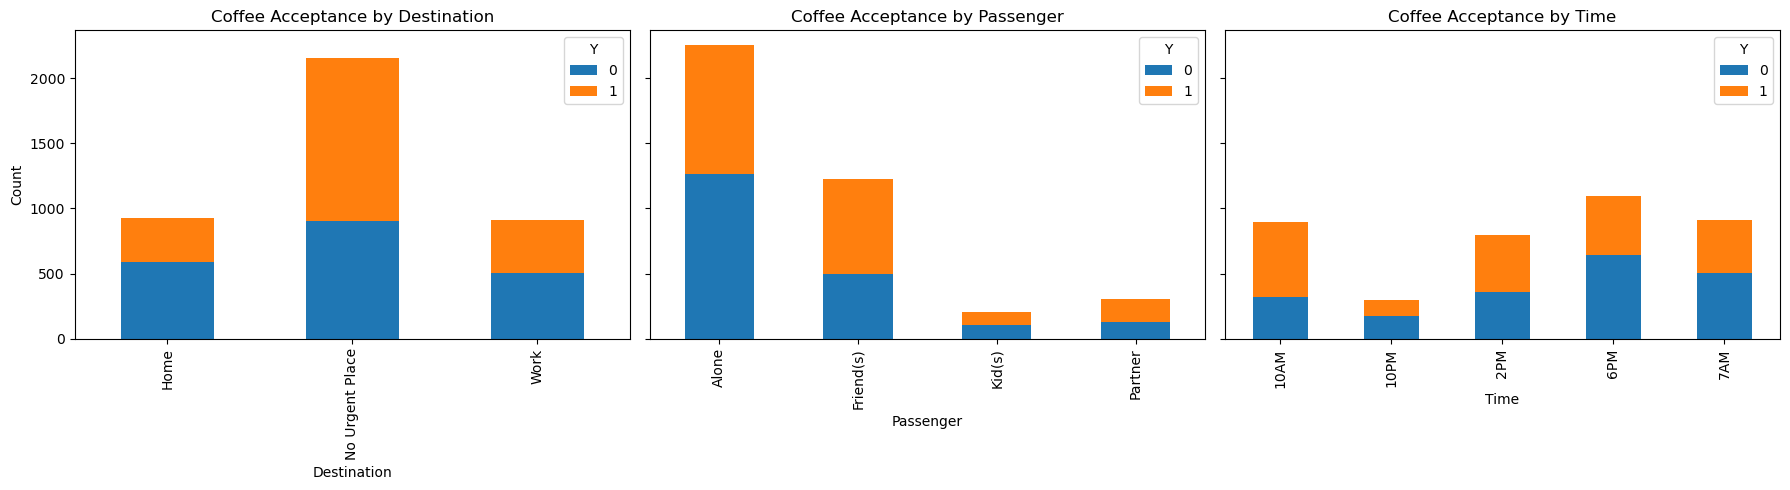

In [107]:
#1- Coffee Coupon vs Destination, Passenger, & Time
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Coffee by Destination
pd.crosstab(coffee["destination"], data["Y"]).plot(
    kind="bar", stacked=True, ax=axes[0]
)
axes[0].set_xlabel("Destination")
axes[0].set_ylabel("Count")
axes[0].set_title("Coffee Acceptance by Destination")

# Coffee by Passenger
pd.crosstab(coffee["passanger"], data["Y"]).plot(
    kind="bar", stacked=True, ax=axes[1]
)
axes[1].set_xlabel("Passenger")
axes[1].set_title("Coffee Acceptance by Passenger")

# Coffee by Time
pd.crosstab(coffee["time"], data["Y"]).plot(
    kind="bar", stacked=True, ax=axes[2]
)
axes[2].set_xlabel("Time")
axes[2].set_title("Coffee Acceptance by Time")

plt.tight_layout()
plt.savefig("images/coffee_acceptance_subplots.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#Destination plot reveals high Coffee House coupon accepatance for drivers with No Urgent Destination
#Passenger plot seems pretty even across passengers with slightly more acceptance with Friend(s). Further analysis below.


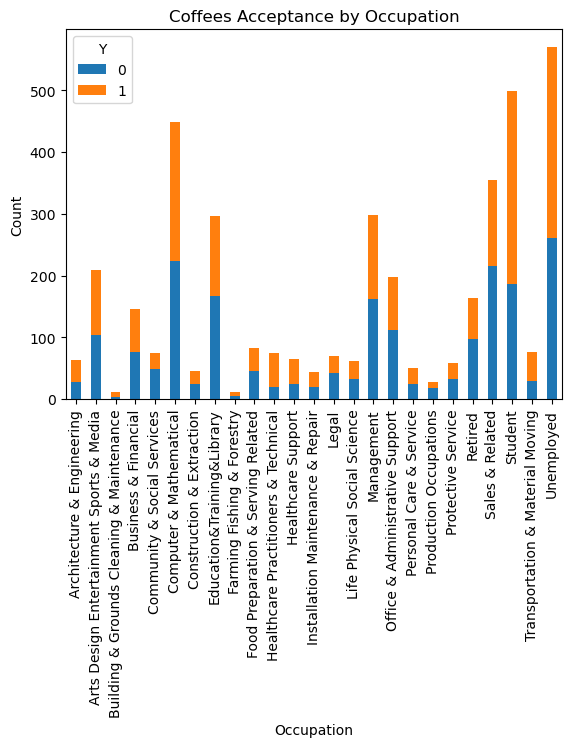

Coffee Accepted by Unemployed: 54%,Coffee Accepted by Employed: 49%


In [133]:
#plott Coffee against occupations
pd.crosstab(coffee["occupation"], data["Y"]).plot(kind="bar", stacked=True)
#plot labels
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Coffees Acceptance by Occupation")
plt.savefig("images/coffee_acceptance_occupation.png", dpi=300, bbox_inches="tight")
plt.show()

#bar plot shows almost 50% acceptance for unemployed
#additional analysis below to assess acceptance between Unemployed and Employed

#subsetting Coffee data by Occupation: unemployed vs employed
coffee_unemployed = coffee[coffee['occupation']=='Unemployed']
coffee_employed = coffee[~coffee.index.isin(coffee_unemployed.index)]

#respective acceptance rates
unemployed_Y = (coffee_unemployed["Y"].sum()/coffee_unemployed["Y"].value_counts().sum())*100
employed_Y = (coffee_employed["Y"].sum()/coffee_employed["Y"].value_counts().sum())*100

print("Coffee Accepted by Unemployed: {:.0f}%,Coffee Accepted by Employed: {:.0f}%".format(unemployed_Y, employed_Y))

In [120]:
#plot Coffee against passengers
#subsetting Coffee data by Passenger: Alone vs Accompanied
coffee_alone = coffee[coffee['passanger']=='Alone']
coffee_accompanied = coffee[~coffee.index.isin(coffee_alone.index)]

#respective acceptance rates
alone_Y = (coffee_alone["Y"].sum()/coffee_alone["Y"].value_counts().sum())*100
accompanied_Y = (coffee_accompanied["Y"].sum()/coffee_accompanied["Y"].value_counts().sum())*100

print("Coffee Coupon Accepted while Alone: {:.0f}%,Coffee Coupon Accepted with Passengers: {:.0f}%".format(alone_Y, accompanied_Y))


Coffee Accepted while ALone: 44%,Coffee Accepted with Passengers: 58%


In [126]:
#plot Coffee against Time seems to display higher acceptance in earlier hours
morning = ["7AM", "10AM"]
afternoon = ["2PM","6PM","10PM"]

#subsetting Coffee data by Time morning and afternoon
coffee_morning = coffee[(coffee["time"].isin(morning))]
coffee_afternoon = coffee[(coffee["time"].isin(afternoon))]

#acceptance calculations
morning_Y = (coffee_morning["Y"].sum()/coffee_morning["Y"].value_counts().sum())*100
afternoon_Y = (coffee_afternoon["Y"].sum()/coffee_afternoon["Y"].value_counts().sum())*100

print("Coffee Coupon Accepted morning: {:.0f}%,Coffee Coupon Accepted afternoon: {:.0f}%".format(morning_Y, afternoon_Y))

Coffee Coupon Accepted morning: 54%,Coffee Coupon Accepted afternoon: 46%


In [132]:
#For fun, combining highest performing criteria against lowest
#Drivers with passengers in the morning VS Drivers alone in the afternoon

#subset Passenger subsets from previous
morning_pass = coffee_accompanied[(coffee_accompanied["time"].isin(morning))]
afternoon_alone = coffee_alone[(coffee_alone["time"].isin(afternoon))]

#acceptance calculations
mp_Y = (morning_pass["Y"].sum()/morning_pass["Y"].value_counts().sum())*100
aa_Y = (afternoon_alone["Y"].sum()/afternoon_alone["Y"].value_counts().sum())*100

print("Coffee Coupon Accepted Mornings w/ Passengers: {:.0f}%,Coffee Coupon Accepted Afternoons Alone: {:.0f}%".format(mp_Y, aa_Y))

Coffee Coupon Accepted Mornings w/ Passengers: 66%,Coffee Coupon Accepted Afternoons Alone: 36%
